## Clasificador de aspirantes a la universidad.
Vamos a analizar una base de datos de examenes de ingreso a una universidad, consta de la calificacion de 2 examenes, y el resultado (ingreso, no ingreso).
A partir de un modelo de regresion logistica podemos definir futura aceptacion de ingresantes en funcion de sus calificaciones.

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importamos los datos


In [26]:
#El dataset
datafile = 'ex2data1.txt'
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True)
#Matriz x, matriz y
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
#Numero de datos
m = y.size
#Insertar columna de 1's
X = np.insert(X,0,1,axis=1)

### Visualización

In [27]:
#Dividir los datos entre los admitidos y los rechazados
adm = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
noAdm = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

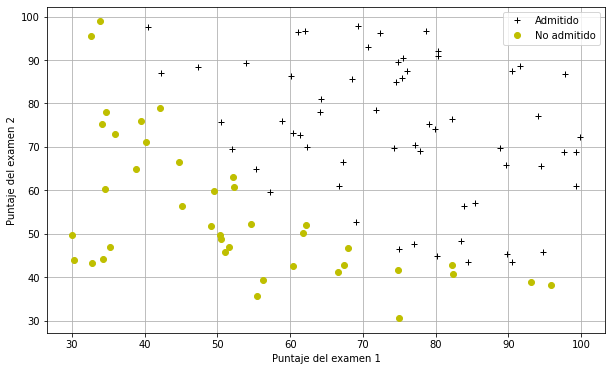

In [28]:
def plotData():
    plt.figure(figsize=(10,6))
    plt.plot(adm[:,1],adm[:,2],'k+',label='Admitido')
    plt.plot(noAdm[:,1],noAdm[:,2],'yo',label='No admitido')
    plt.xlabel('Puntaje del examen 1')
    plt.ylabel('Puntaje del examen 2')
    plt.legend()
    plt.grid(True)
    
plotData()

### Implementacion

Funcion hipotesis
$$ h_ \theta (x) =  \frac{\mathrm{1} }{\mathrm{1} + e^{- \theta^Tx} }  $$ 
Funcion de costo
$$  J (\theta) =\frac{1}{m}\sum_{i=1}^{m} [-y^{(i)}log(h_ \theta (x^{(i)})) - (1-y^{(i)})log(1-h_ \theta (x^{(i)}))] + \frac{\lambda}{2m}\sum_{j=1}^{n} \theta^2_j $$

In [29]:
#Funcion Sigmoid
from scipy.special import expit

In [30]:
#Funcion hipotesis (H) y funcion de costo (J)
def h(mytheta,myX): 
    return expit(np.dot(myX,mytheta))

def computeCost(mytheta,myX,myy,mylambda = 0.): 
    """
    X matriz de n-filas y m-columnas
    theta es una matriz de m-filas y 1 columna
    y es una matrix with m-filas y una columna
    Note: esta funcion incluye lambda, que sera utilizado para regularizar la funcion,
    se usara en la segunda parte de la presentación
    """
    term1 = np.dot(-np.array(myy).T,np.log(h(mytheta,myX)))
    term2 = np.dot((1-np.array(myy)).T,np.log(1-h(mytheta,myX)))
    regterm = (mylambda/2) * np.sum(np.dot(mytheta[1:].T,mytheta[1:]))
    #term1 y term2 son matrices 1x1, por eso np.sum
    J = float((1./m) * (np.sum(term1 - term2) + regterm))  
    return J

In [31]:
#Iniciar theta matriz de ceros, resultado esperado: J = 0.693
initial_theta = np.zeros((X.shape[1],1))

#Lambda = 0 (sin regularización)
computeCost(initial_theta,X,y)

0.6931471805599453

In [32]:
#La alternativa de OCTAVE "fminunc" es "fmin" de scipy.optimize
#"fmin" no necesita recibir la derivada de la funcion
#Minimiza la funcion (la funcion costo en este caso) con "downhill simplex algorithm".
#http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.optimize.fmin.html
from scipy import optimize

def optimizeTheta(mytheta,myX,myy,mylambda=0.):
    """
    Devuelve una lista, el primer termino es theta optimizado para el modelo, y el segundo
    es el costo minimo de la función
    """
    result = optimize.fmin(computeCost, x0=mytheta, args=(myX, myy, mylambda), maxiter=400, full_output=True)
    return result[0], result[1]

In [33]:
theta, mincost = optimizeTheta(initial_theta,X,y)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [34]:
#Se vuelve a calular el costo, pero esta vez con el theta optimizado con la funcion "optimizeTheta"
#Se espera un resultado de J = 0.203
print(computeCost(theta,X,y))

0.2034977015902151


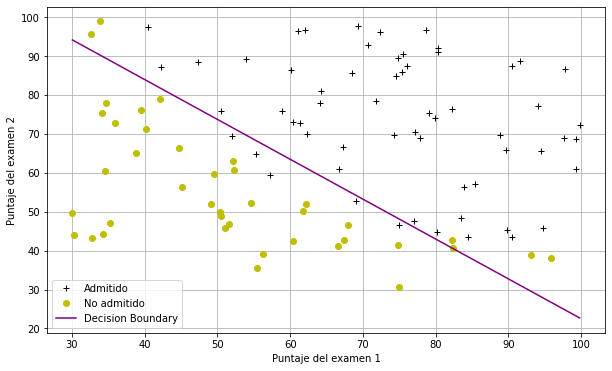

In [35]:
#Se grafican los "decision boundary"
#Los boundary suceden cuando h = 0.5 o cuando theta*X = 0
#theta0 + theta1*x1 + theta2*x2 = 0
#y=mx+b pasando los terminos x2 = (-1/thetheta2)(theta0 + theta1*x1)

boundary_xs = np.array([np.min(X[:,1]), np.max(X[:,1])])
boundary_ys = (-1./theta[2])*(theta[0] + theta[1]*boundary_xs)
plotData()
plt.plot(boundary_xs,boundary_ys,'b-',label='Decision Boundary', color = "purple", linewidth = 1.5)
plt.legend()
plt.show()

In [36]:
#Para un estudiante con puntajes de 45 y 85 deberia tener una probabilidad de aprobar de 0.776
print(h(theta,np.array([1, 45.,85.])))

0.7762915904112411


In [37]:
def makePrediction(mytheta, myx):
    return h(mytheta,myx) >= 0.5

#Calcular las predicciones realizadas correctamente
adm_correct = float(np.sum(makePrediction(theta,adm)))
noAdm_correct = float(np.sum(np.invert(makePrediction(theta,noAdm))))
tot = len(adm)+len(noAdm)
prcnt_correct = float(adm_correct+noAdm_correct)/tot
print ("Porcentaje de datos predecidos correctamente: %.2f" % prcnt_correct )

Porcentaje de datos predecidos correctamente: 0.89
